In [7]:
using BenchmarkTools
include("../src/MyUnits.jl")

x_arr = 10 .^ (range(-2, stop=2, length=50))

function f(x::Array, y::Real)
    x .+ y
end

function f(x::Array, y::Array)
    x + y
end

f (generic function with 2 methods)

In [1]:
using BenchmarkTools
using Unitful

import Unitful: DimensionlessQuantity, Temperature

abstract type Patate end

struct Example{T<:Real} <: Patate
    a::DimensionlessQuantity{T}
    c::DimensionlessQuantity{T}
    b::Temperature{T}
end

struct Example2{T<:Real} <: Patate
    a::T
    b::T
    c::T
end

struct Example3{T<:Real} <: Patate
    a::T
    b::Temperature{T}
    c::T
end


function Example(a::Real, b::Real, c::Temperature{<:Real}) 
    return Example(promote(a, b, c)...)
end 

Example2(a::Real, b::Real, c::Real) = Example2(promote(a, b, c)...)

ex  = Example(2.3, 4//2,  4u"K")
ex2 = Example2(2.3, 4, 4//2)
ex3 = Example3(2.3, 4.0u"K", 2.0)


function mult(p::Patate)
    return p.a * p.c
end

@derived_dimension Mode dimension(1/u"km")
power_law(amplitude::Real, index::Real, k::Mode{<:Real}) = amplitude * (k / 0.05 * Mpc)^(index-1) ## To be checked

println(typeof(power_law))

typeof(power_law)


In [1]:
using BenchmarkTools

using Unitful
import Unitful: km, s, Gyr
using UnitfulAstro: Mpc, Gpc, Msun

include("../src/MyCosmology.jl")
include("../src/PowerSpectrum.jl")

import .MyCosmology: FLRWPLANCK18


In [3]:
#@benchmark cosmo = MyCosmology.FlatFLRW(0.6736, 0.26447, 0.04930)
PowerSpectrum.curvature_power_spectrum(0.2/Mpc)

4.9328720557107265e-6 Mpc³

0.31377 9.21221186221331e-5 0.6861378778813779


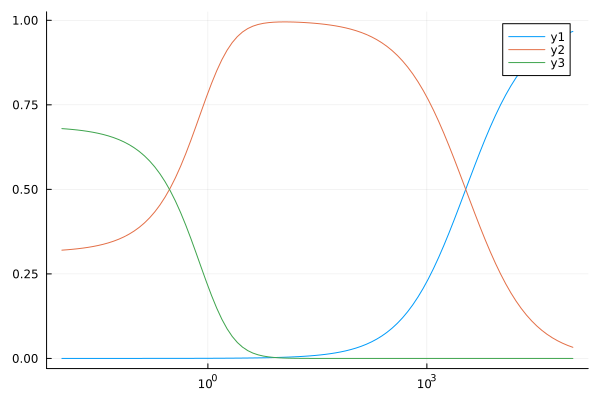

In [2]:
using Plots

z = 10 .^(range(-2,stop=5,length=100))

println(FLRWPLANCK18.Ω_m0, " ", FLRWPLANCK18.Ω_r0, " ", FLRWPLANCK18.Ω_Λ0)

Ω_r = MyCosmology.ρ_r.(z) ./ MyCosmology.ρ_c.(z)
Ω_m = MyCosmology.Ω_m.(z)
Ω_Λ = MyCosmology.Ω_Λ.(z)

ρ_r = MyCosmology.ρ_r.(z)
ρ_m = MyCosmology.ρ_m.(z)
ρ_Λ = MyCosmology.ρ_Λ.(z)
ρ_c = MyCosmology.ρ_c.(z)

plot(z, Ω_r)
plot!(z, Ω_m)
plot!(z, Ω_Λ)


plot!(size=(600, 400), xscale=:log10,  minorgrid=false)
